In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [ ]:
# Peak detection and gaussian on the histogram of the image heights

# H
# |          =               
# |          = =            
# |  =     = = =              
# |  =     = = = =             
# |= =   = = = = =      =        
# |= = = = = = = = =  = = =         
# \ - - - - - - - - - - - - X



In [ ]:
# Identify the background
#   Generate mask
#   Estimate polynomial background
# Determine 1-D background offsets from the raw data within the mask
# Subtract the 1-D offsets from the raw data followed by a single masked background flattening.

solution: 2.365620 x + 2.951475 y + 7.256311 = z
errors: 
 [[ -4.23681778]
 [-13.24087508]
 [ -5.85588578]
 [  4.11247435]
 [ -0.78186946]
 [  6.10208318]
 [ -2.91250669]
 [  7.32881183]
 [  6.33481172]
 [  3.14977372]]
residual: 19.863712447040715


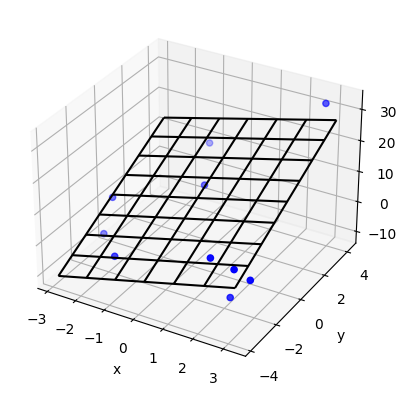

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# These constants are to create random data for the sake of this example
N_POINTS = 10
TARGET_X_SLOPE = 2
TARGET_y_SLOPE = 3
TARGET_OFFSET  = 5
EXTENTS = 5
NOISE = 5

# Create random data.
# In your solution, you would provide your own xs, ys, and zs data.
xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*TARGET_X_SLOPE + \
              ys[i]*TARGET_y_SLOPE + \
              TARGET_OFFSET + np.random.normal(scale=NOISE))

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)

# Manual solution
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print("solution: %f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print("errors: \n", errors)
print("residual:", residual)

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [47]:
# Median
def median_flattening(image: np.ndarray):
    for j in range(image.shape[0]):
        # Get the median of the row
        m = np.median(image[j, :])
        # print(m)
        image[j, :] -= m
    return image

# Median differences
def median_differences_flattening(image: np.ndarray):
    for j in range(image.shape[0]):
        if j > 0:
            median_height_diff_above = np.median(image[j, :] - image[j-1, :])
            # print(f'median difference in height: {median_height_diff_above}')
            image[j, :] -= median_height_diff_above
    return image

def add_ring(image: np.ndarray, outer_size: int = 200, inner_size: int = 100, centre: tuple = (0, 0), height: int = 10):
    cx = centre[0]
    cy = centre[1]
    for i in range(-outer_size, outer_size):
        for j in range(-outer_size, outer_size):
                if j+cy < image.shape[0] - 1:
                    if i+cx < image.shape[1] - 1:
                        if ((i)**2 + (j)**2) < outer_size**2 and i**2 + j**2 > inner_size**2:             
                            image[i+cx, j+cy] += height
    return image


def remove_plane_tilt(image: np.ndarray):
    # Get x-slope
    # Get median LHS x value
    x_lhs_median = np.median(image[:, 0])
    x_rhs_median = np.median(image[:, image.shape[1]-1])
    dx = (x_rhs_median - x_lhs_median) / (image.shape[1] - 1)
    print(f'avg x left: {x_lhs_median}')
    print(f'avg x right: {x_rhs_median}')
    print(f'dx: {dx}')
    y_top_median = np.median(image[0, :])
    y_bottom_median = np.median(image[image.shape[0]-1, :])
    dy = (y_bottom_median - y_top_median) / (image.shape[0] - 1)
    print(f'avg y top: {y_top_median}')
    print(f'avg y bot: {y_bottom_median}')
    print(f'dy: {dy}')

    for j in range(image.shape[0]):
        for i in range(image.shape[1]):
            image[j, i] -= (dx * i + dy * j)
            # print(f'subbing: {dx} * {i} + {dy} * {j}')
    
    return image


shape: (1024, 1024)


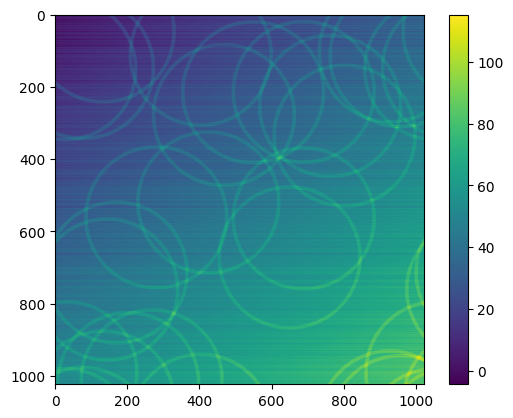

avg x left: 26.907905980435117
avg x right: 57.49008820082162
dx: 0.029894606276037634
avg y top: 16.75121632244478
avg y bot: 72.49999792746178
dy: 0.054495387688188665


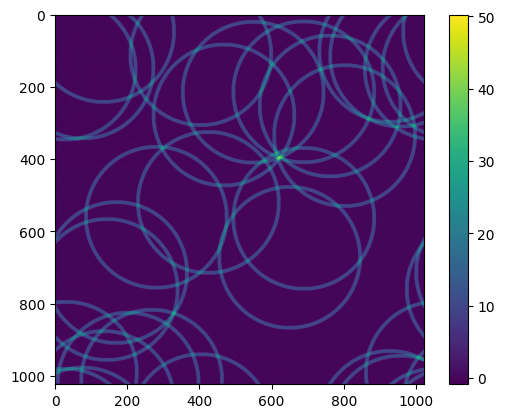

In [48]:
# file_name = 'images/random_scanlines_0.png'
# im = Image.open(file_name)
# im_array = np.array(im, dtype=float)
# im_array = im_array[:, :, 0]
# im_array = np.array([[1, 1, 1, 1], [5, 5, 5, 5], [1, 1, 1, 1], [1, 1, 1, 1]], dtype=np.float64)



im_array = np.ones((1024, 1024))
for i in range(20):
    im_array = add_ring(im_array, outer_size=200, inner_size=190, centre=(np.random.randint(0,im_array.shape[1]), np.random.randint(0, im_array.shape[0])))


# Add scan lines
for j in range(im_array.shape[0]):
    im_array[j, :] += (np.random.random() - 0.5) * 12

# Add random noise
for j in range(im_array.shape[0]):
    for i in range(im_array.shape[1]):
        im_array[j, i] += (np.random.random() - 0.5)

# Add slant 
for j in range(im_array.shape[0]):
    for i in range(im_array.shape[1]):
        im_array[j, i] += (0.05*j) + (0.03*i)

print(f'shape: {im_array.shape}')

plt.imshow(im_array)
plt.colorbar()
plt.show()

# im_array = median_differences_flattening(im_array)
im_array = remove_plane_tilt(im_array)
im_array = median_flattening(im_array)
# im_array = median_differences_flattening(im_array)

plt.imshow(im_array)
plt.colorbar()
